In [49]:
import pandas as pd
import numpy as np
import math
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image, display  
#from omniplot  import plot as op


In [50]:
shooting = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/player_premier_league_shooting.csv')

shooting



,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,0,Brenden Aaronson,us USA,"MF,FW",Leeds United,21,26.4,1,41,9,...,0.34,0.02,0.11,0,0,3.9,3.9,0.09,-2.9,-2.9
1,1,George Abbott,eng ENG,MF,Tottenham,16,0.0,0,0,0,...,0.00,NaN,NaN,0,0,0.0,0.0,NaN,0.0,0.0
2,2,Che Adams,sct SCO,FW,Southampton,26,22.1,5,47,14,...,0.63,0.11,0.36,0,0,6.6,6.6,0.14,-1.6,-1.6
3,3,Tyler Adams,us USA,MF,Leeds United,23,24.0,0,4,0,...,0.00,0.00,NaN,0,0,0.1,0.1,0.03,-0.1,-0.1
4,4,Tosin Adarabioyo,eng ENG,DF,Fulham,24,23.2,1,16,4,...,0.17,0.06,0.25,0,0,0.7,0.7,0.04,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,Jordan Zemura,zw ZIM,DF,Bournemouth,22,16.2,0,4,0,...,0.00,0.00,NaN,0,0,0.4,0.4,0.10,-0.4,-0.4
565,565,Oleksandr Zinchenko,ua UKR,DF,Arsenal,25,23.5,1,28,7,...,0.30,0.04,0.14,0,0,1.4,1.4,0.05,-0.4,-0.4
566,566,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,29,7.3,0,16,3,...,0.41,0.00,0.00,0,0,0.6,0.6,0.04,-0.6,-0.6
567,567,Kurt Zouma,fr FRA,DF,West Ham,27,22.1,2,19,5,...,0.23,0.11,0.40,0,0,2.2,2.2,0.12,-0.2,-0.2


Looking to check the players in the premier league that have the most shots on goal per 90 minutes to determine whether a rough estimate of their goals can be calculated

<AxesSubplot:>

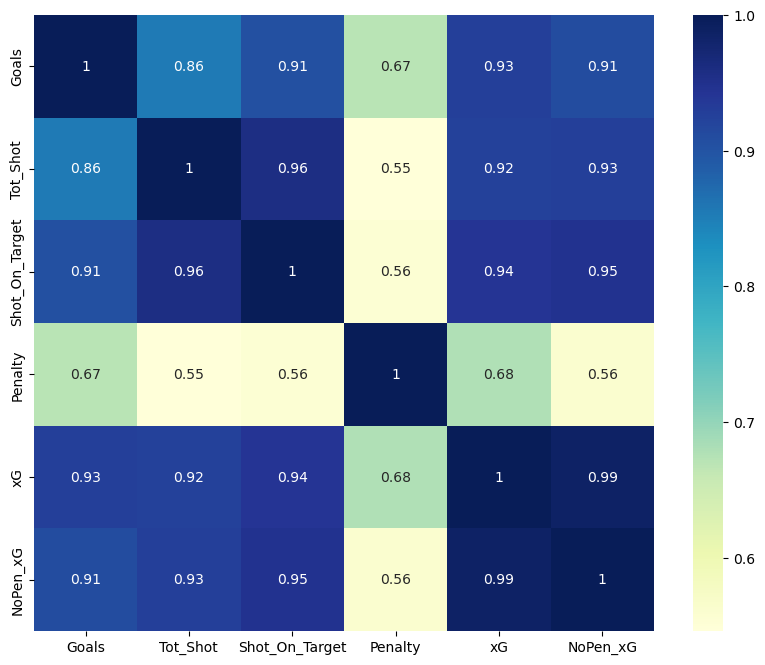

In [51]:
shooting_df = shooting.sort_values(by='xG',ascending=False)
#According to the dateset these are the players which accumulated the most xG over the course of the season
#as we determine who had the most amount of goals during the season 
shooting_df.head(10)

shooting_df.drop(columns='Unnamed: 0',inplace=True)
featureData = shooting_df[['Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG']]


shot_correlation=featureData.corr()
plt.figure(figsize=(10,8))
sns.heatmap(shot_correlation,cmap="YlGnBu",annot=True)



Next we will create a bar chart to show the players that scored and also took the most shots over the course of the season

,Player,Nation,Pos,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
217,Erling Haaland,no NOR,FW,Manchester City,22,30.8,36,116,53,45.7,...,1.72,0.25,0.55,7,7,28.4,23.0,0.20,7.6,6.0
265,Harry Kane,eng ENG,FW,Tottenham,29,37.8,30,124,54,43.5,...,1.43,0.20,0.46,5,6,21.5,16.7,0.13,8.5,8.3
515,Ivan Toney,eng ENG,FW,Brentford,26,32.8,20,87,33,37.9,...,1.01,0.16,0.42,6,7,18.7,13.2,0.15,1.3,0.8
452,Mohamed Salah,eg EGY,FW,Liverpool,30,36.6,19,121,45,37.2,...,1.23,0.14,0.38,2,4,21.7,18.5,0.15,-2.7,-1.5
551,Callum Wilson,eng ENG,FW,Newcastle Utd,30,20.9,18,70,31,44.3,...,1.49,0.21,0.48,3,3,17.5,15.1,0.22,0.5,-0.1
422,Marcus Rashford,eng ENG,FW,Manchester Utd,24,32.0,17,108,49,45.4,...,1.53,0.16,0.35,0,0,15.4,15.4,0.15,1.6,1.6
327,Gabriel Martinelli,br BRA,FW,Arsenal,21,31.0,15,79,30,38.0,...,0.97,0.19,0.50,0,0,9.3,9.3,0.12,5.7,5.7
568,Martin Ødegaard,no NOR,MF,Arsenal,23,34.7,15,93,31,33.3,...,0.89,0.16,0.48,0,0,10.0,10.0,0.11,5.0,5.0
541,Ollie Watkins,eng ENG,FW,Aston Villa,26,34.7,15,84,45,53.6,...,1.30,0.17,0.31,1,2,16.5,14.9,0.18,-1.5,-0.9
356,Aleksandar Mitrović,rs SRB,FW,Fulham,27,22.3,14,85,27,31.8,...,1.21,0.12,0.37,4,8,14.9,8.6,0.10,-0.9,1.4


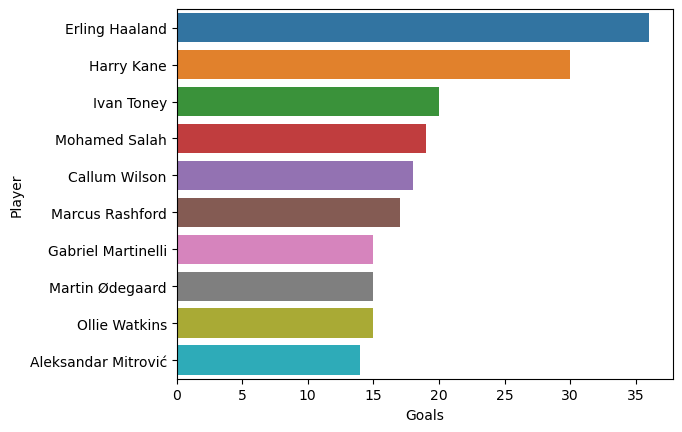

In [52]:
top10Goals = shooting_df.sort_values(by='Goals',ascending=False).head(10)

sns.barplot(x='Goals',y='Player',data=top10Goals)
top10Goals

In [53]:
top20Shots = shooting_df.sort_values(by='Tot_Shot',ascending=False).head(20)
top20Goals = shooting_df.sort_values(by='Goals',ascending=False).head(20)
squad_count['Shots_Per Squad'] = top20Goals['Squad'].value_counts()

SquadsMostShots = squad_count.head(10)

SquadsMostShots






Arsenal            4
Manchester City    2
Tottenham          2
Liverpool          2
Newcastle Utd      2
Leicester City     2
Brentford          1
Manchester Utd     1
Aston Villa        1
Fulham             1
Name: Squad, dtype: object

In [54]:
"""res=op.scatterplot(shooting_df, 
               x="Goals",
               y="xG", 
               category=['Squad'],
                marginal_dist=True,
                kde=True,
                regression=True,
                save="shooting.png")"""

'res=op.scatterplot(shooting_df, \n               x="Goals",\n               y="xG", \n               category=[\'Squad\'],\n                marginal_dist=True,\n                kde=True,\n                regression=True,\n                save="shooting.png")'

In [55]:
PerTeam_shooting_df=shooting_df.groupby(by='Squad')
PerTeam_shooting_df

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

reg = LinearRegression()

x=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

reg.fit(X_train,y_train)

print(reg.score(X_test,y_test))

y_pred=reg.predict(X_test)


Cristiano_pred_stats=reg.predict([[110,43,17.42,14]])
Cristiano_pred_stats

print(Cristiano_pred_stats)

print(y_test)


0.8970798943603966
[17.93384227]
3       0
497     6
445     0
227     0
164     0
       ..
422    17
53      0
221     7
477     1
404     1
Name: Goals, Length: 171, dtype: int64


In [134]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

X=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']



X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

model = DecisionTreeRegressor(random_state=1)

model.fit(X_train,y_train)

print(model.predict([[110,43,17.42,14]]))

ronaldo_stats

print(model.score(X_test,y_test))


print(y_test)

[19.]
0.8375569682151589
3       0
497     6
445     0
227     0
164     0
       ..
422    17
53      0
221     7
477     1
404     1
Name: Goals, Length: 171, dtype: int64


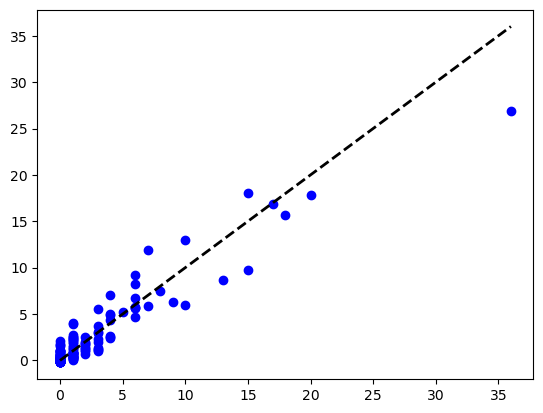

In [ ]:
plt.scatter(y_test,y_pred,color='Blue')

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.show()

Text(0, 0.5, 'xG')

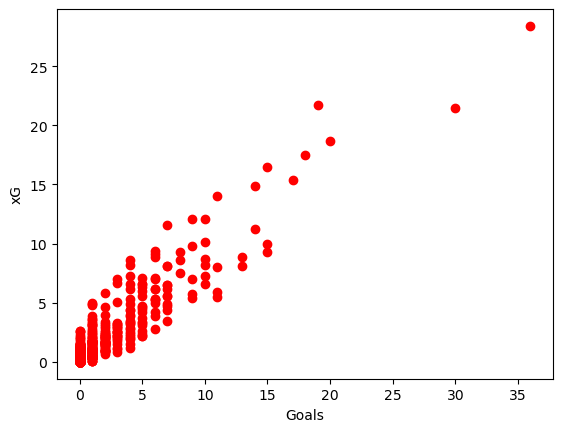

In [ ]:
plt.scatter(x='Goals',y='xG', data=shooting_df,c='Red')
#plt.plot(x,y,color='green')
plt.xlabel('Goals')
plt.ylabel('xG')

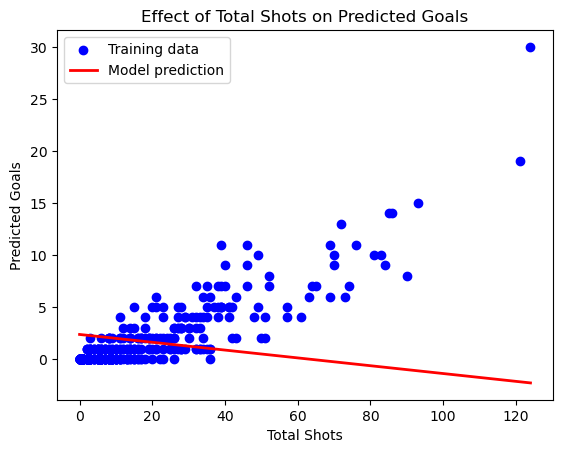

In [ ]:
import numpy as np  
  
# Get the mean values for the features  
mean_values = np.mean(X_train, axis=0)  
  
# Now, let's choose 'Tot_Shot' (the first feature) and vary it across its range  
# while keeping the other features fixed at their mean values.  
tot_shots_range = np.linspace(X_train['Tot_Shot'].min(), X_train['Tot_Shot'].max(), 100)  
predictions = []  
  
for shot in tot_shots_range:  
    # We create a feature vector where 'Tot_Shot' varies, but other features are constant  
    feature_vector = np.array([shot, mean_values['Shot_On_Target'], mean_values['xG'], mean_values['NoPen_xG']])  
    # Predict the goal for each feature vector  
    predicted_goal = reg.predict([feature_vector])  
    predictions.append(predicted_goal)  
  
# Plot the relationship between 'Tot_Shot' and predicted goals  
plt.scatter(X_train['Tot_Shot'], y_train, color='blue', label='Training data')  
plt.plot(tot_shots_range, predictions, color='red', linewidth=2, label='Model prediction')  
plt.xlabel('Total Shots')  
plt.ylabel('Predicted Goals')  
plt.title('Effect of Total Shots on Predicted Goals')  
plt.legend()  
plt.show()  


,Age,Total Goals
0,15,0
1,16,0
2,17,8
3,18,10
4,19,7
5,20,29
6,21,49
7,22,128
8,23,97
9,24,102


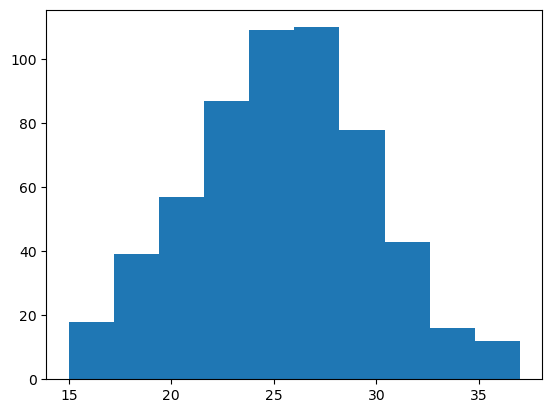

In [ ]:

Age_group=shooting_df.groupby(by='Age')['Goals'].sum().reset_index()
Age_group.rename(columns={'Goals':'Total Goals'},inplace=True)
age_dist = plt.hist(shooting_df['Age'])
Age_group

Text(0.5, 1.0, 'Goals to Age Ratio')

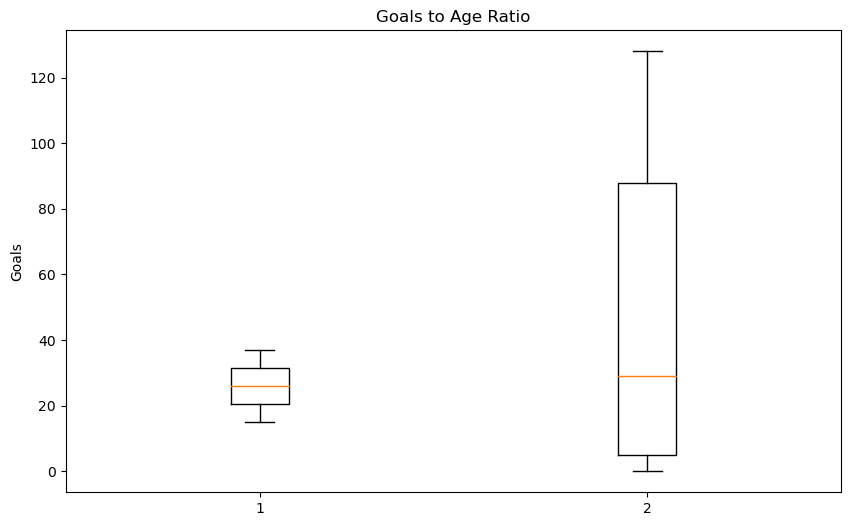

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([Age_group['Age'],Age_group['Total Goals']])
plt.ylabel('Goals')
plt.title('Goals to Age Ratio')

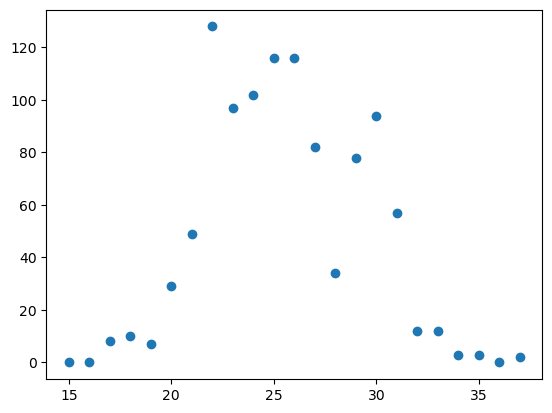

In [ ]:
plt.scatter(x='Age',y='Total Goals',data=Age_group)